## Mini Project - Data Science and Big Data Analytics - Google Trend Analysis

### Importing Packages Required

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Matplotlib Inline command is a magic command that makes the plots 
# generated by matplotlib show into the IPython shell that we are 
# running and not in a separate output window.

sns.set()

In [3]:
data = pd.read_csv('multiTimeline.csv', skiprows = 1)
# add the skiprows argument to skip the first row 
# at the start of the file

data.head()

,Week,Virat Kohli: (India),Rohit Sharma: (India),MS Dhoni: (India),Lionel Messi: (India),Cristiano Ronaldo: (India)
0,2018-05-13,14,4,11,4,5
1,2018-05-20,15,4,16,5,7
2,2018-05-27,11,3,21,7,9
3,2018-06-03,11,3,8,8,7
4,2018-06-10,10,2,8,17,21


In [6]:
# add .info() method to look upon the data types of all the rows
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Week                        260 non-null    object
 1   Virat Kohli: (India)        260 non-null    int64 
 2   Rohit Sharma: (India)       260 non-null    int64 
 3   MS Dhoni: (India)           260 non-null    int64 
 4   Lionel Messi: (India)       260 non-null    int64 
 5   Cristiano Ronaldo: (India)  260 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 12.3+ KB


In [9]:
# now making the data columns more presentable
data.columns = ['Week', 'Kohli', 'Rohit', 'Dhoni', 'Messi', 'Ronaldo']
data.head()

,Week,Kohli,Rohit,Dhoni,Messi,Ronaldo
0,2018-05-13,14,4,11,4,5
1,2018-05-20,15,4,16,5,7
2,2018-05-27,11,3,21,7,9
3,2018-06-03,11,3,8,8,7
4,2018-06-10,10,2,8,17,21


In [12]:
data.Week = pd.to_datetime(data.Week)
data.set_index("Week", inplace = True)

In [13]:
data.head()

,Kohli,Rohit,Dhoni,Messi,Ronaldo
Week,,,,,
2018-05-13,14,4,11,4,5
2018-05-20,15,4,16,5,7
2018-05-27,11,3,21,7,9
2018-06-03,11,3,8,8,7
2018-06-10,10,2,8,17,21


Text(0, 0.5, 'Popularity in India')

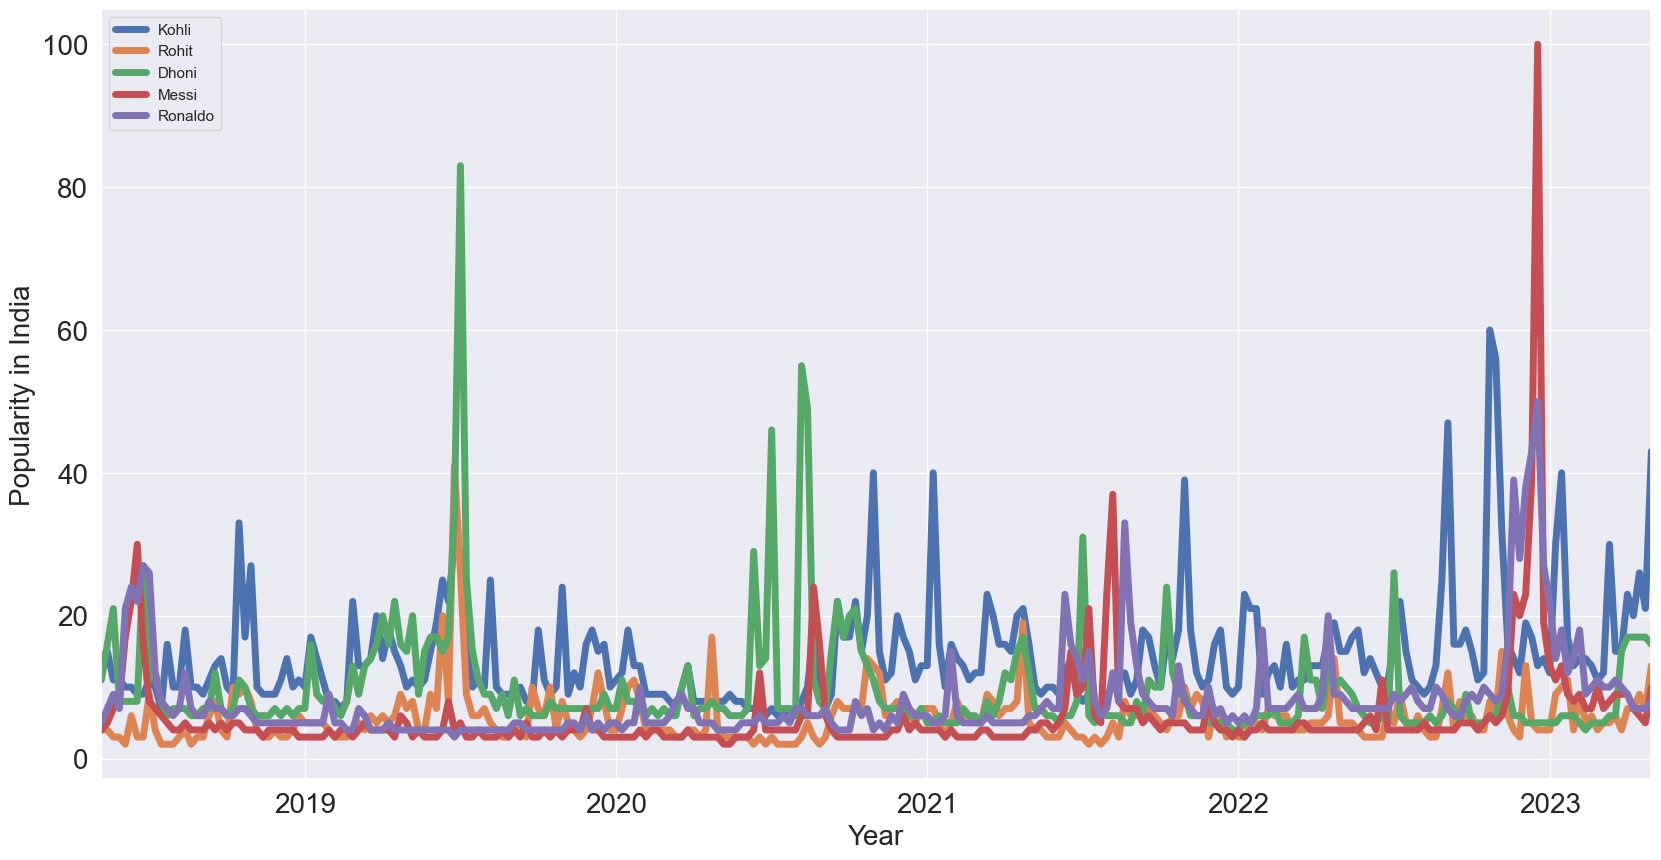

In [19]:
data.plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);
plt.ylabel('Popularity in India', fontsize=20)

Text(0, 0.5, 'Popularity of Messi in India')

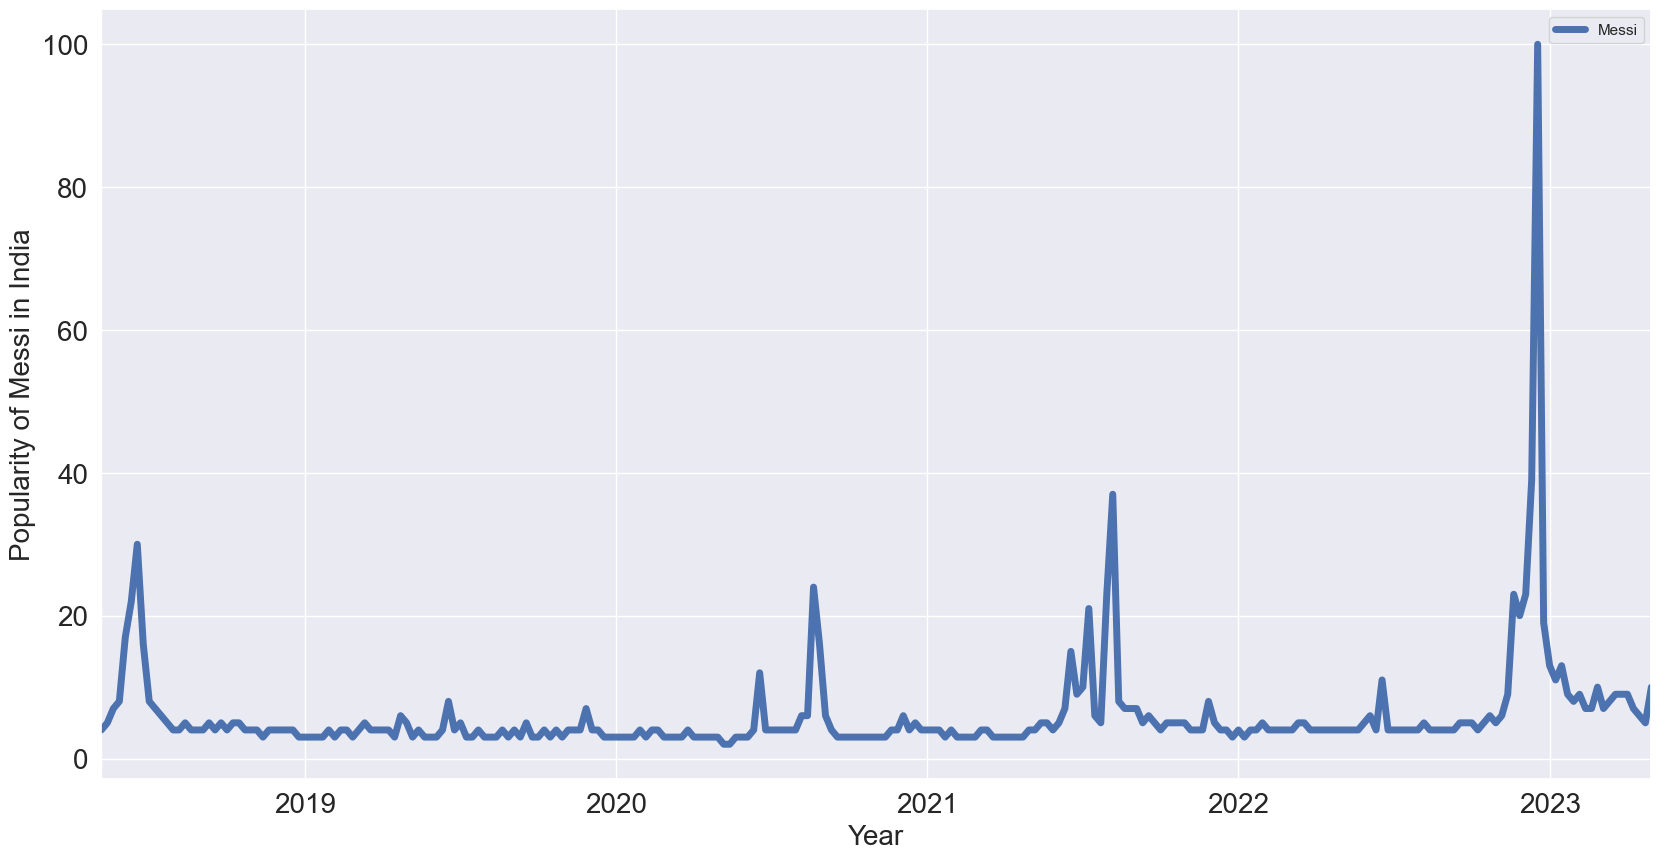

In [20]:
data[['Messi']].plot(figsize=(20, 10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);
plt.ylabel('Popularity of Messi in India', fontsize=20)

Text(0, 0.5, 'Popularity of Dhoni in India')

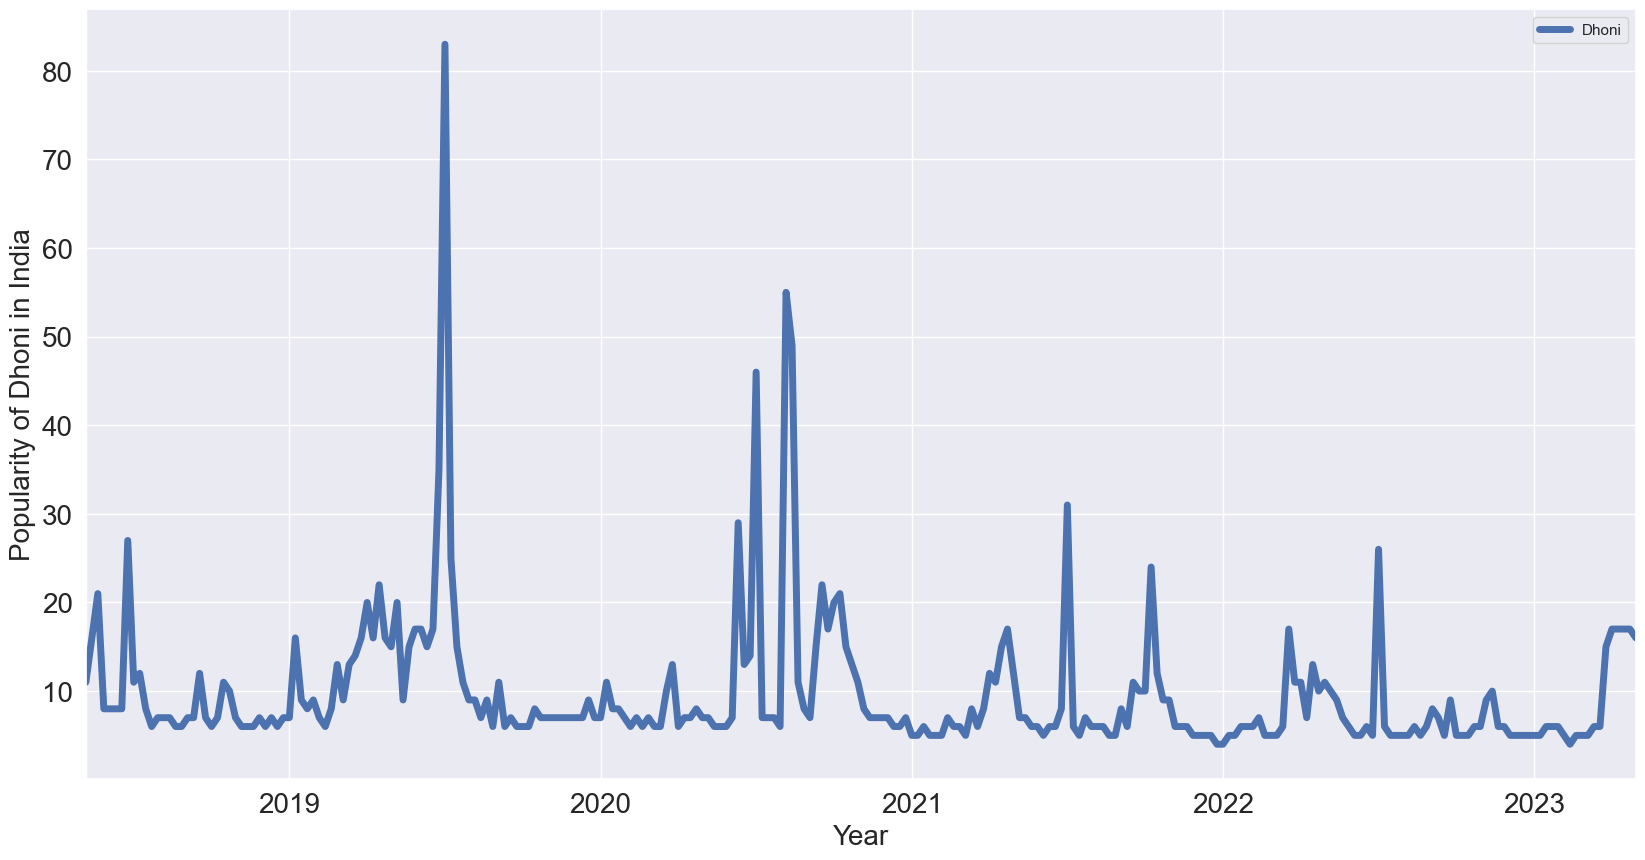

In [22]:
data[['Dhoni']].plot(figsize=(20, 10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);
plt.ylabel('Popularity of Dhoni in India', fontsize=20)

### As we can see for MS Dhoni in the middle of 2019 and 2020 there is a massive spike, because of the decision of his retirement :(

Text(0.5, 0, 'Year')

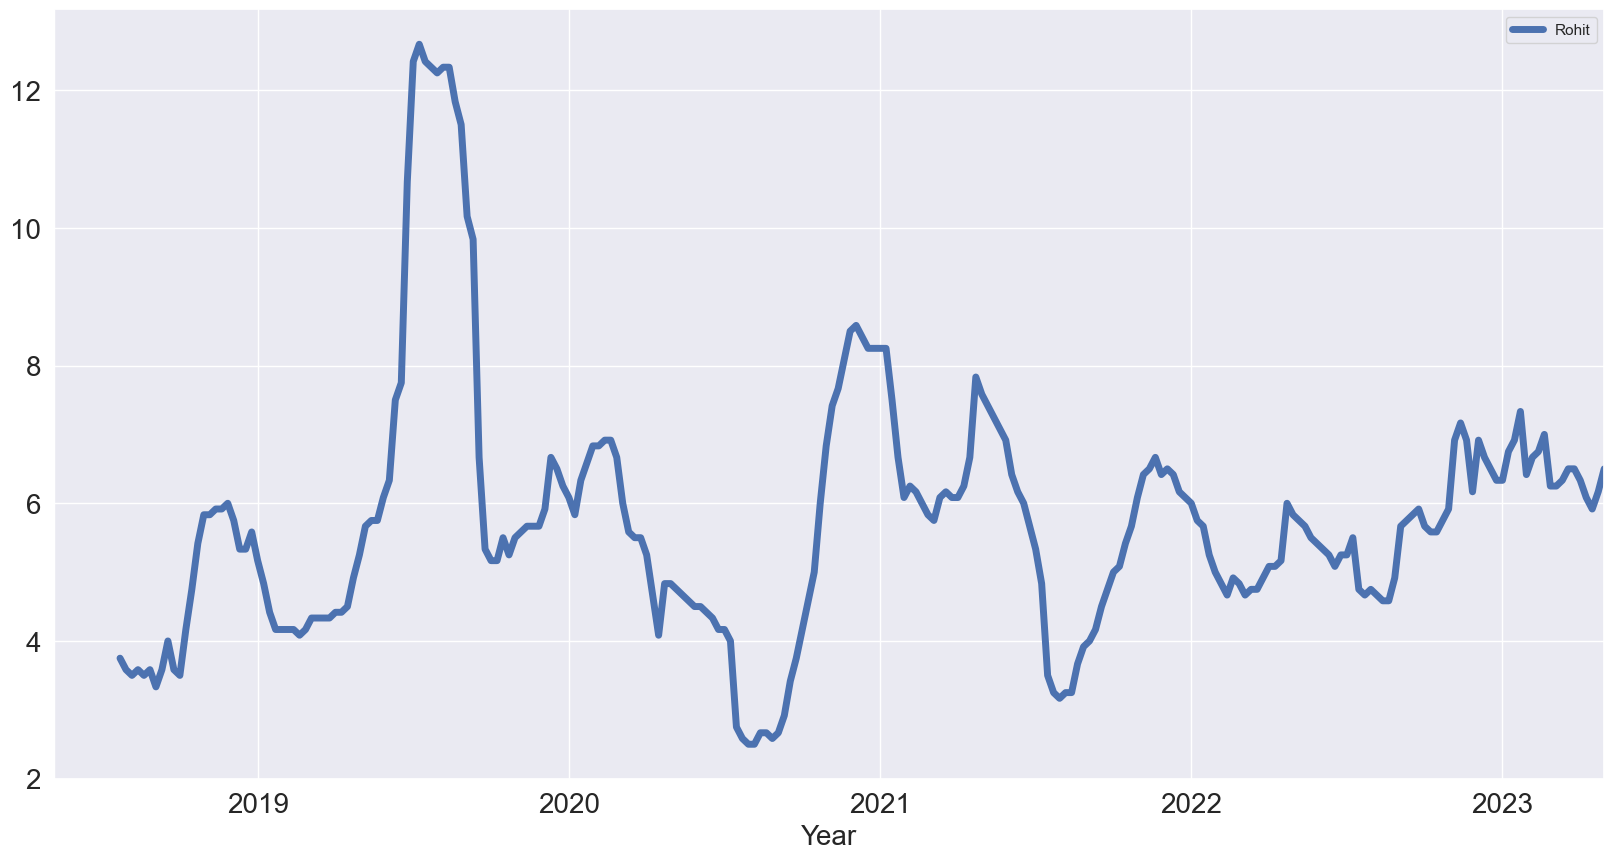

In [24]:
rohit = data[['Rohit']]
rohit.rolling(12).mean().plot(figsize=(20, 10), linewidth=5, fontsize=20)
plt.xlabel("Year", fontsize=20)

In [26]:
# the method above used is done to smooth the trend analysis 
# by taking the average of the data and creating a specific window 
# here it is of 12 months
# This method is also known as "Rolling Average"

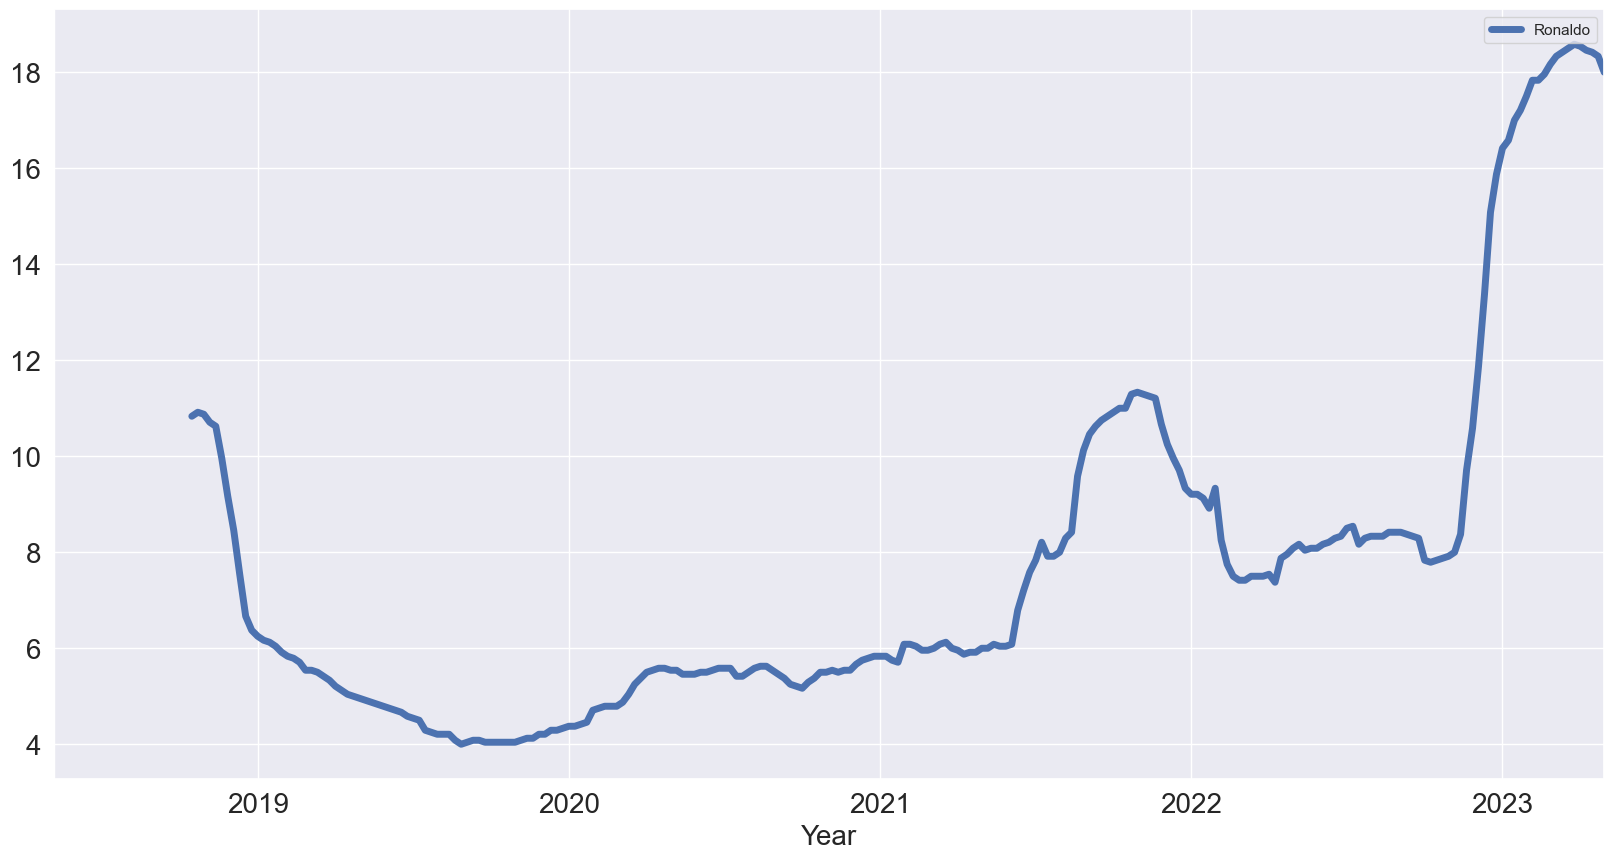

In [30]:
ronaldo = data[['Ronaldo']]
ronaldo.rolling(24).mean().plot(figsize=(20, 10), linewidth=5, fontsize=20)
plt.xlabel("Year", fontsize=20);
# 24 months average - rolling average method

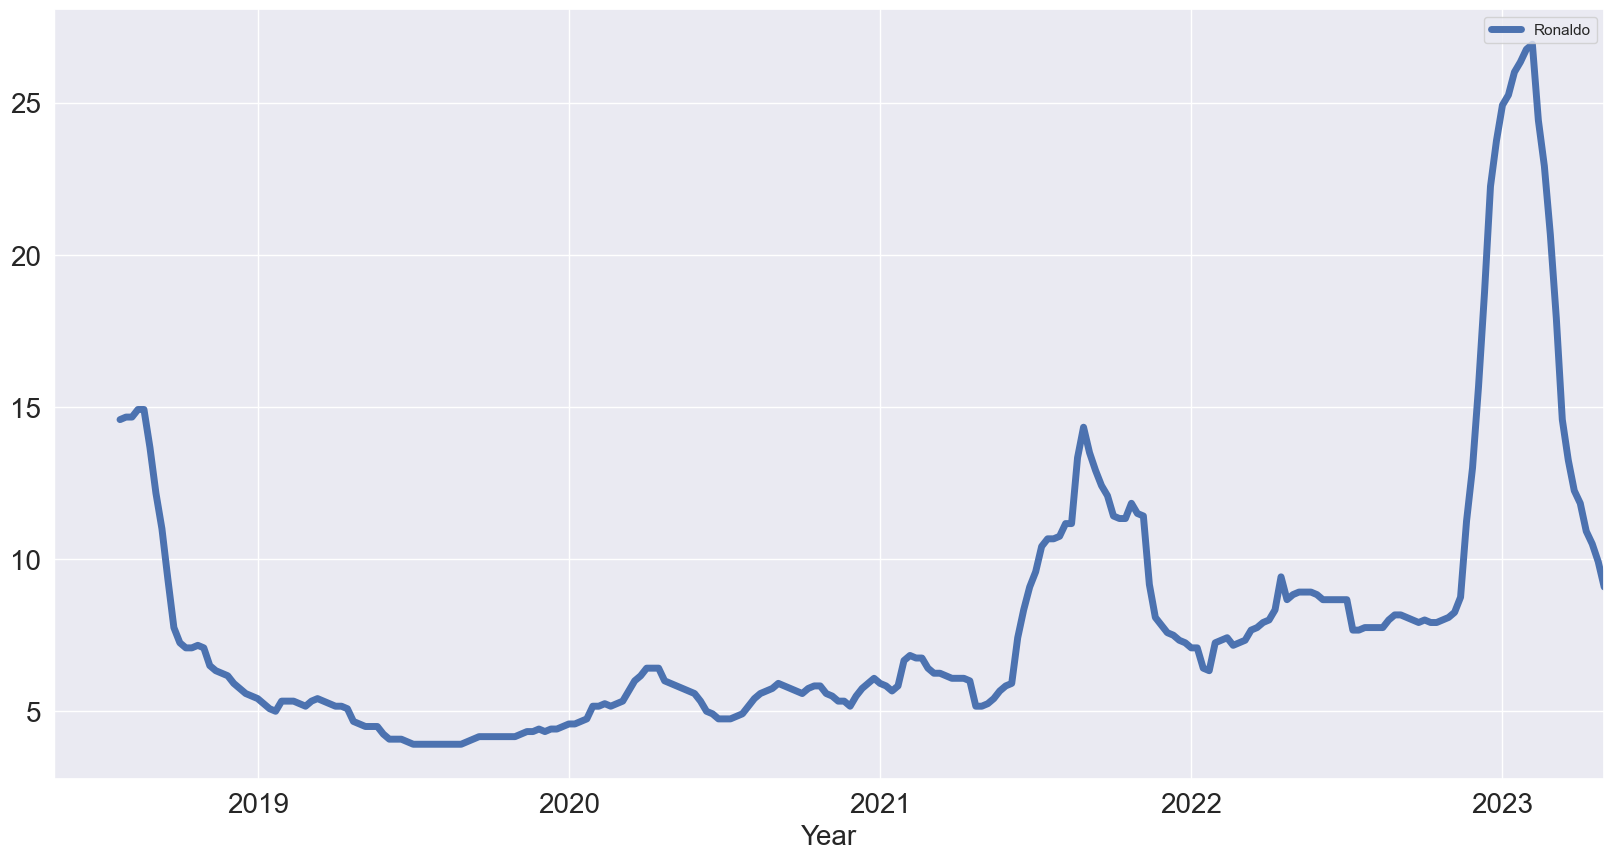

In [31]:
ronaldo = data[['Ronaldo']]
ronaldo.rolling(12).mean().plot(figsize=(20, 10), linewidth=5, fontsize=20)
plt.xlabel("Year", fontsize=20);
# 12 months average - rolling average method

### Now if we have to compare 2 or more attributes : 

Text(0, 0.5, 'Popularity in India')

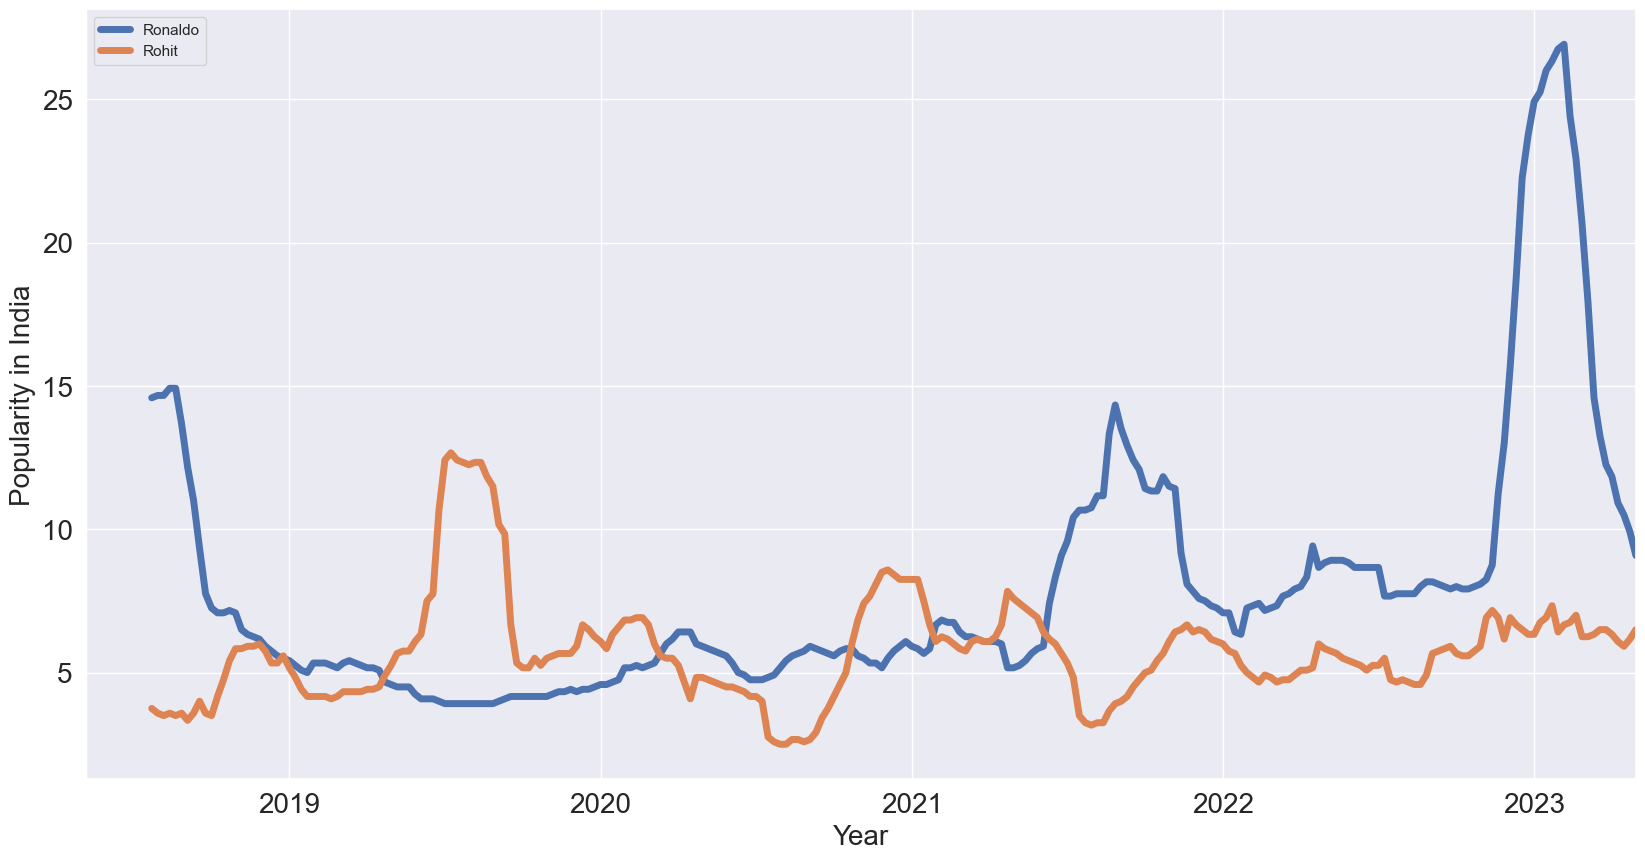

In [34]:
comp = pd.concat([ronaldo.rolling(12).mean(), rohit.rolling(12).mean()], axis=1)
comp.plot(figsize=(20, 10), linewidth=5, fontsize=20)
plt.xlabel("Year", fontsize=20)
plt.ylabel('Popularity in India', fontsize=20)

## Seasonal Trends and Patterns

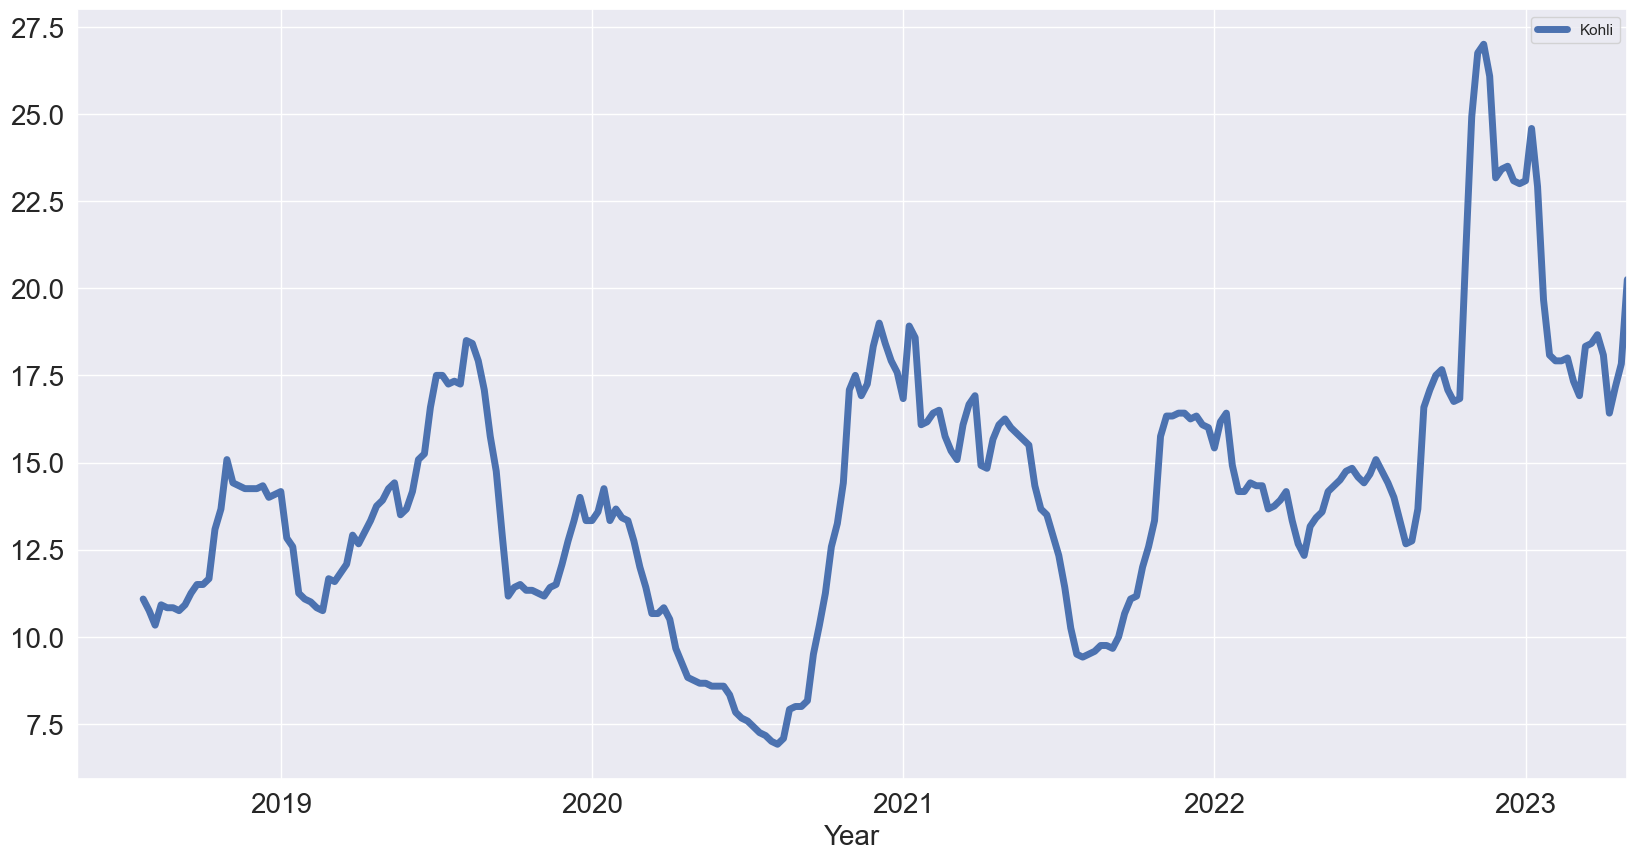

In [35]:
virat = data[['Kohli']]
virat.rolling(12).mean().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);

Text(0.5, 0, 'Year')

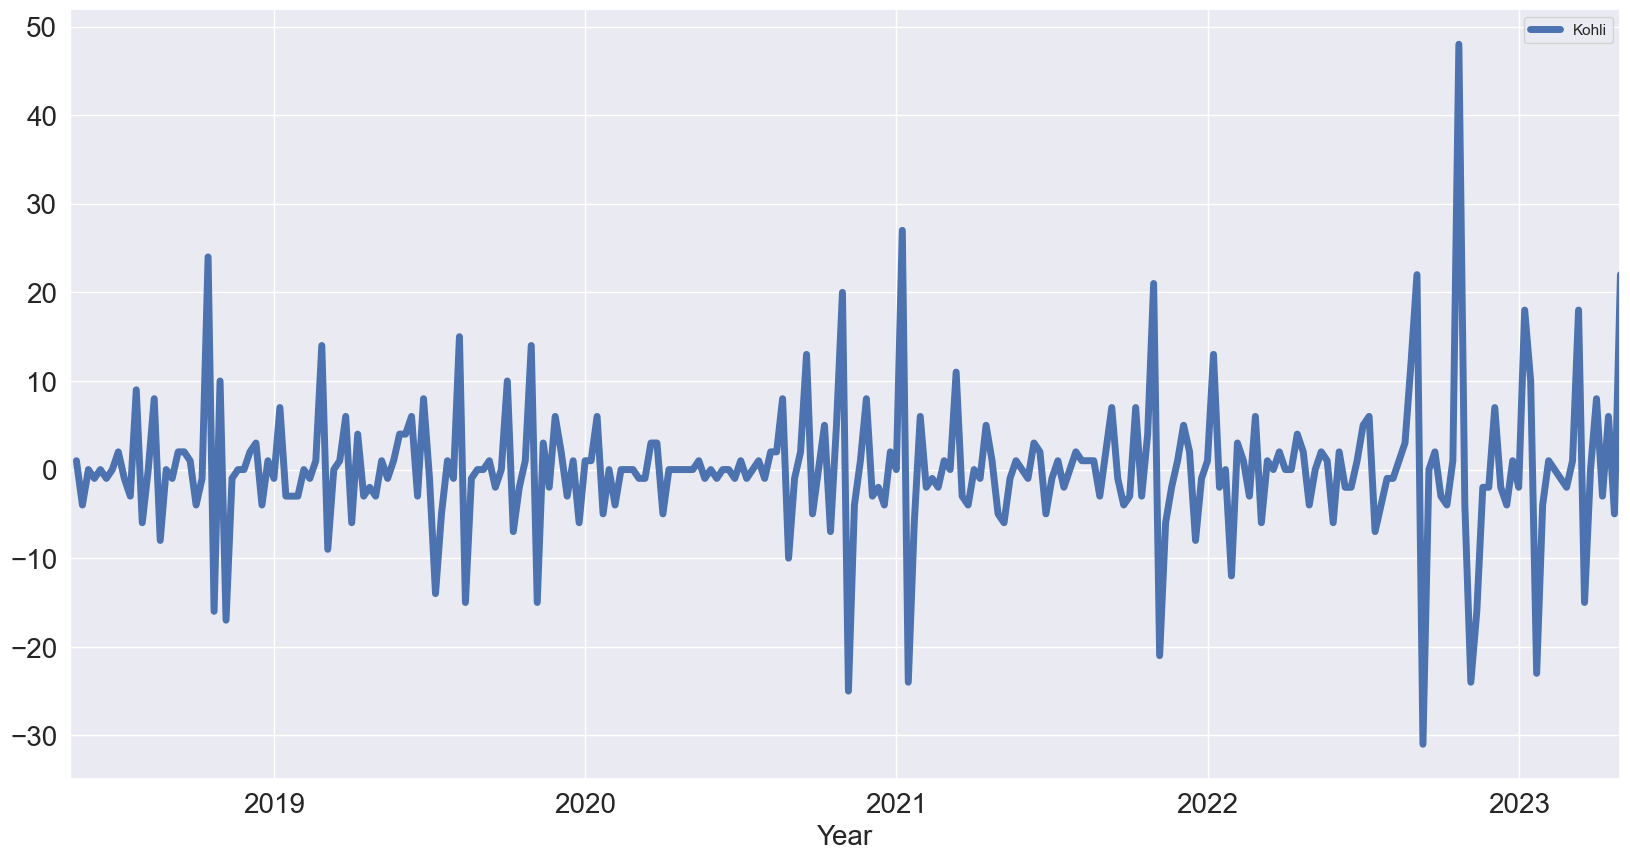

In [37]:
virat.diff().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel("Year", fontsize=20)

## As you can see in the seasonal trends as soon as the big cricket event comes Virat Kohli's Popularity increases.
## The massive spike before 2023 was due to 71st century he scored in Asia Cup.

# Correlation

In [38]:
data.corr()

,Kohli,Rohit,Dhoni,Messi,Ronaldo
Kohli,1.000000,0.491038,0.108377,-0.004534,0.018491
Rohit,0.491038,1.000000,0.342616,-0.075430,-0.050410
Dhoni,0.108377,0.342616,1.000000,-0.058894,-0.126039
Messi,-0.004534,-0.075430,-0.058894,1.000000,0.727348
Ronaldo,0.018491,-0.050410,-0.126039,0.727348,1.000000


## Virat Kohli and Rohit Sharma have a correlation of 0.49 as they play for the country.
## But the correlation between Virat and Messi is negative as they play in 2 different sports

# Differences 

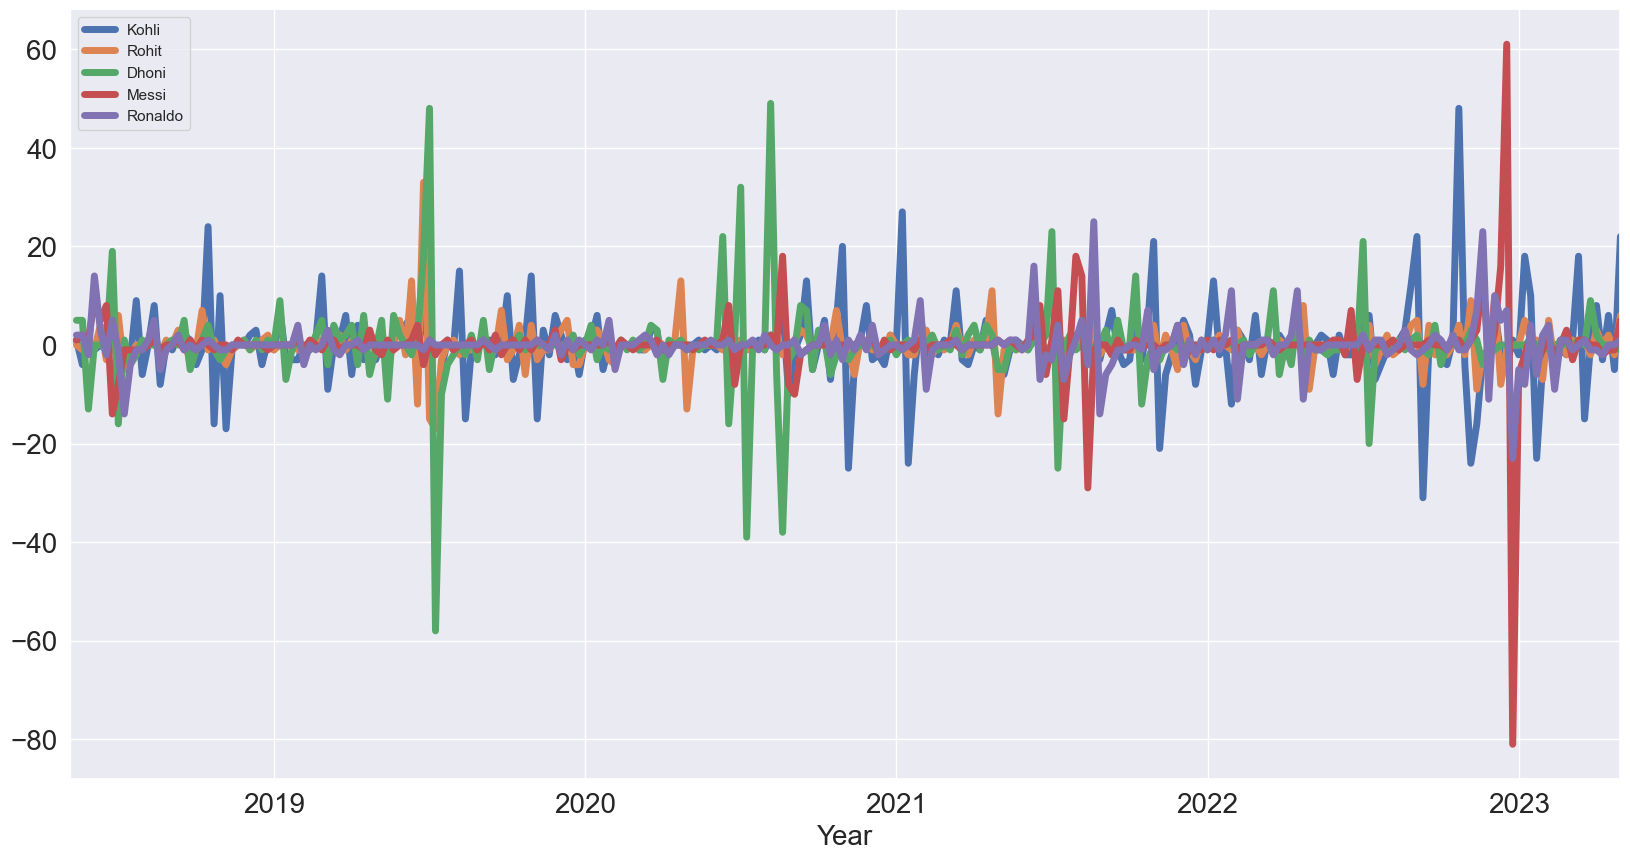

In [39]:
data.diff().plot(figsize=(20, 10), linewidth=5, fontsize=20)
plt.xlabel("Year", fontsize=20);

## Now the combination of correlation and differences

In [40]:
data.diff().corr()

,Kohli,Rohit,Dhoni,Messi,Ronaldo
Kohli,1.000000,0.289733,0.099048,0.004458,-0.022802
Rohit,0.289733,1.000000,0.118266,-0.053738,0.006081
Dhoni,0.099048,0.118266,1.000000,-0.065611,-0.002000
Messi,0.004458,-0.053738,-0.065611,1.000000,0.432781
Ronaldo,-0.022802,0.006081,-0.002000,0.432781,1.000000


## Auto correlation

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

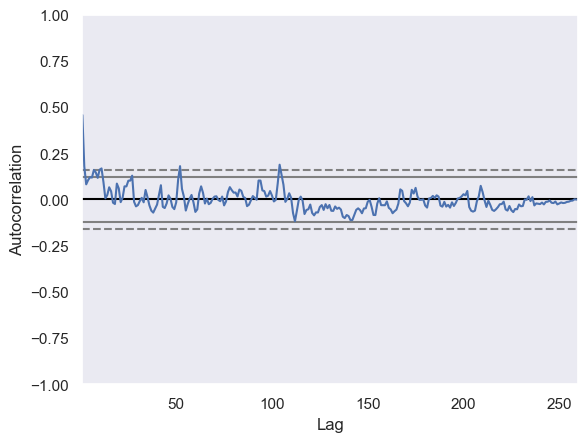

In [41]:
pd.plotting.autocorrelation_plot(virat)

# Conclusion : In this project, learning that are covered are correlation, plotting, multiple value plotting, auto-correlation, differences etc.